In [353]:
import spacy
import pandas as pd
import en_core_web_sm
import random
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import re
from collections import Counter
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve,  classification_report
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [354]:
#reading the data
text = pd.read_csv('/Users/sima/Desktop/Springboard/excercise/tripadvisor_hotel_reviews.csv')
text

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [355]:
text.shape

(20491, 2)

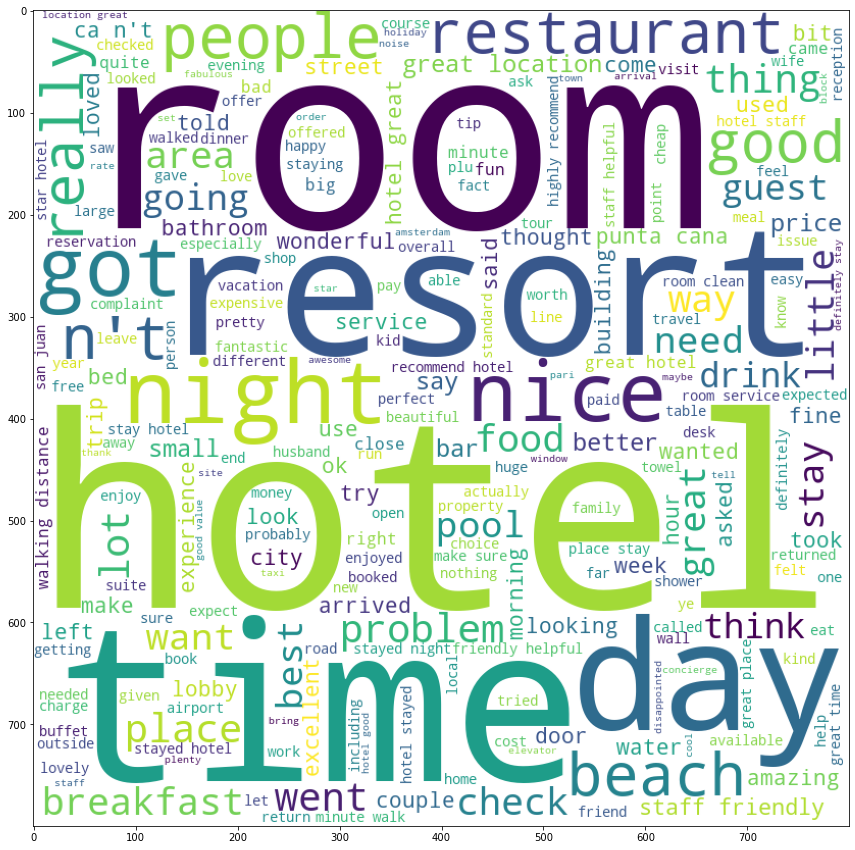

In [4]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=500, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(text['Review']))

plt.imshow(wc2)

In [356]:
def word_count(review):
   list1 = review.split()
   return len(list1)

In [357]:
text['Word_Count'] = text['Review'].apply(word_count)

In [358]:
text

,Review,Rating,Word_Count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109
20487,great location price view hotel great quick pl...,4,39
20488,"ok just looks nice modern outside, desk staff ...",2,63
20489,hotel theft ruined vacation hotel opened sept ...,1,781


<AxesSubplot:xlabel='Rating', ylabel='Word_Count'>

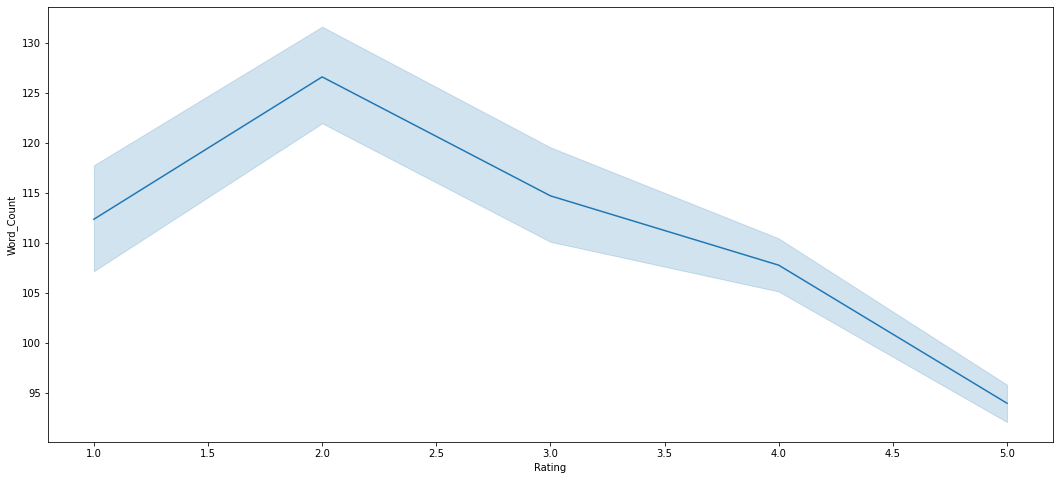

In [359]:
#Reviews with highest word count belongs to negative feedbacks, with 2 star rating being the highest
plt.figure(figsize=(18,8))
sns.lineplot(data=text,x="Rating", y="Word_Count")

In [360]:
Category_count = text['Rating'].value_counts()
Category_count


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Rating'>

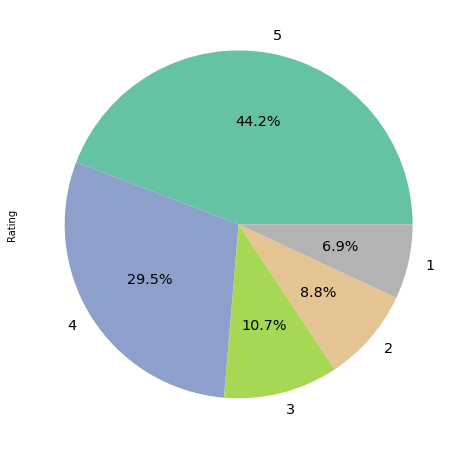

In [361]:
plt.figure(figsize=(8,8))
Category_count.plot(kind='pie', autopct="%.1f%%", colormap='Set2', textprops={'size': 'x-large'})

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


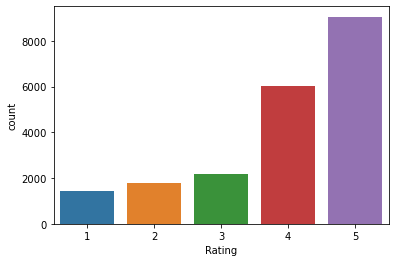

In [362]:
sns.countplot(text['Rating'])
plt.show()

In [363]:
#define the function that counts all 4,5,3 stars as Positive and all 2 and 1 as Negative
def rating(star):
    if star <= 2 and star > 0:
        return 'Negative'
    if star >= 3 and star <= 5:
        return 'Positive'

In [364]:
text['Star_rating'] = text['Rating'].apply(rating)

In [365]:
text

,Review,Rating,Word_Count,Star_rating
0,nice hotel expensive parking got good deal sta...,4,87,Positive
1,ok nothing special charge diamond member hilto...,2,250,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,217,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,Positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,Positive
20487,great location price view hotel great quick pl...,4,39,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,63,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,781,Negative


In [366]:
text['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [367]:
text_positive = text[text['Star_rating'] == 'Positive']

In [368]:
text_positive

,Review,Rating,Word_Count,Star_rating
0,nice hotel expensive parking got good deal sta...,4,87,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,217,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,Positive
5,love monaco staff husband stayed hotel crazy w...,5,134,Positive
...,...,...,...,...
20480,great play stay stay loyal inn package deal ha...,5,33,Positive
20482,great choice wife chose best western quite bit...,5,105,Positive
20483,good bed clean convenient just night happy sta...,4,61,Positive
20486,"best kept secret 3rd time staying charm, not 5...",5,109,Positive


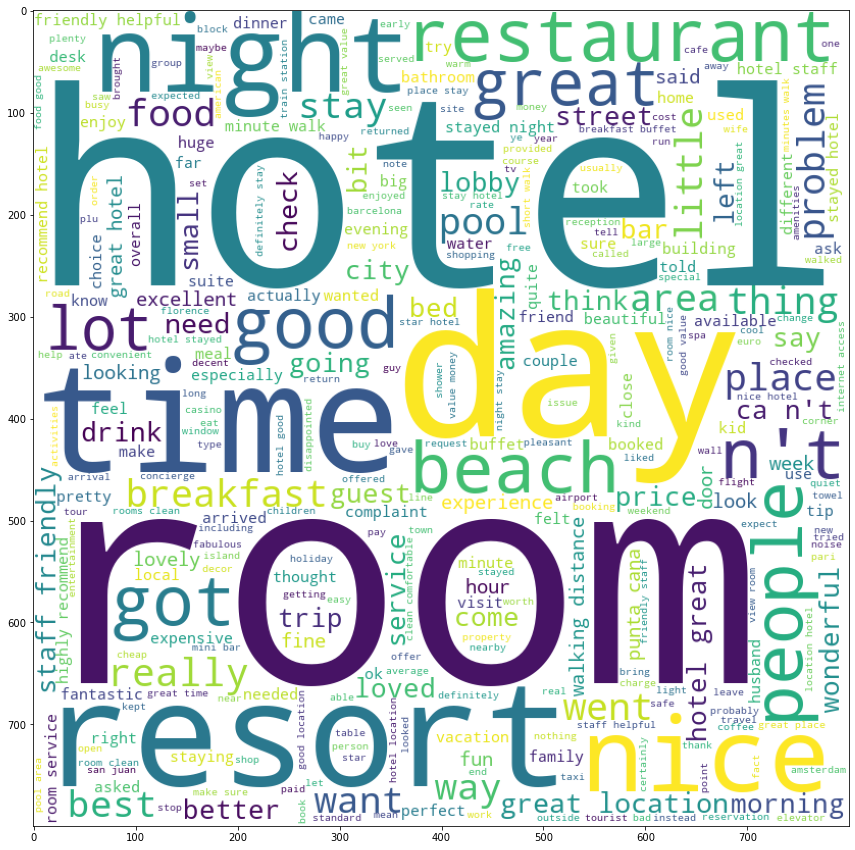

In [75]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=500, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(text_positive['Review']))

plt.imshow(wc2)

In [369]:
#calculating the percentage of Positive vs Negative
text['Star_rating'].value_counts()

Positive    17277
Negative     3214
Name: Star_rating, dtype: int64

In [370]:
text_negative = text[text['Star_rating'] == 'Negative']

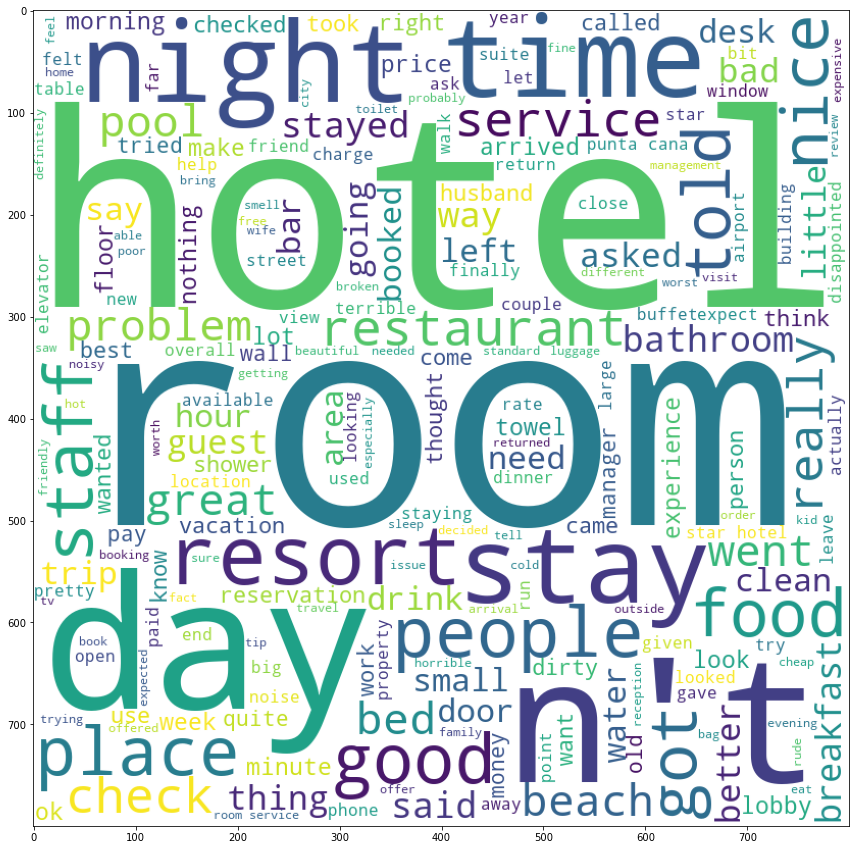

In [78]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=500, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(text_negative['Review']))

plt.imshow(wc2)

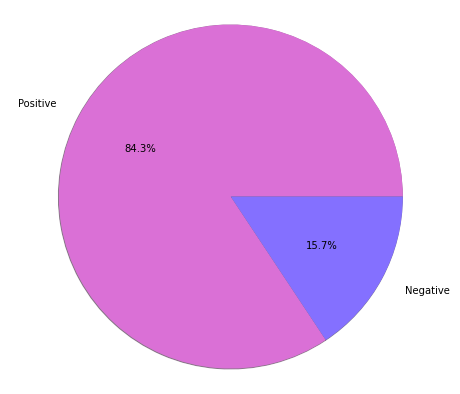

In [371]:
colors = ['#DA70D6', '#8470FF']
plt.figure(figsize=(8,7))
plt.pie(text['Star_rating'].value_counts(), labels=text['Star_rating'].unique().tolist(), autopct='%1.1f%%',shadow= True, colors = colors, labeldistance=1.15, radius = 8)
plt.axis('equal')
plt.show()

In [372]:
# calculating the average word count for positive and negative reviews
def word_count(review):
   list1 = review.split()
   return len(list1)

In [373]:
text['Word_Count'] = text['Review'].apply(word_count)

In [374]:
text

,Review,Rating,Word_Count,Star_rating
0,nice hotel expensive parking got good deal sta...,4,87,Positive
1,ok nothing special charge diamond member hilto...,2,250,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,217,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,Positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,Positive
20487,great location price view hotel great quick pl...,4,39,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,63,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1,781,Negative


[]

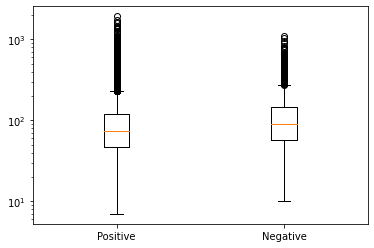

In [375]:
Positive = text.loc[text['Star_rating']== 'Positive', 'Word_Count'].values
Negative = text.loc[text['Star_rating']== 'Negative', 'Word_Count'].values
plt.boxplot([Positive, Negative], labels = ['Positive', 'Negative'])
plt.semilogy()

[]

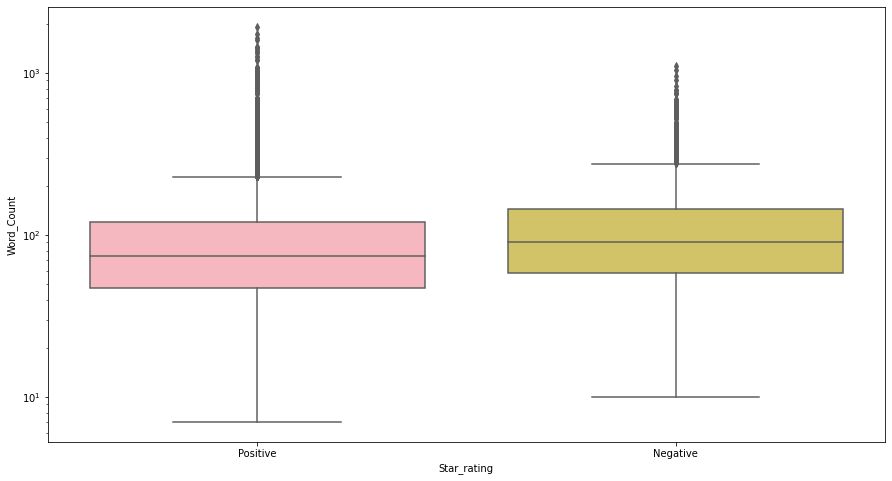

In [376]:
# visualize and compare the average word count used in both Negative and Positive reviews
plt.figure(figsize = (15,8))
my_colors = {'#E3CF57', '#FFAEB9'}
sns.boxplot(y='Word_Count', x='Star_rating', data=text, palette = my_colors )
plt.semilogy()

In [377]:
text.groupby('Star_rating')['Word_Count'].mean()

Star_rating
Negative    120.307094
Positive    101.412166
Name: Word_Count, dtype: float64

In [378]:
# transform all the text to lower case, also removing puntuation and numbers from text
def reg(text):
   text = text.lower()
   #text = re.sub(r'http?://[^\s\n\r]+', '', text)
   text = re.sub('[^a-z A-Z 0-9-]+', '', text)
   return text

In [379]:
#function that removes stopwords from the reviews
words = set(stopwords.words('english'))
def stop_word_removal(text):
    text = " ".join([word for word in text.split() if word not in words and word not in string.punctuation])
    return text
    
    

In [380]:
text['Review'] = text['Review'].apply(stop_word_removal)

In [381]:
text['Review'] = text['Review'].apply(reg)

In [382]:
text['Review'][4]

'great stay great stay went seahawk game awesome downfall view building nt complain room huge staff helpful booked hotels website seahawk package charge parking got voucher taxi problem taxi driver nt want accept voucher barely spoke english funny thing speak arabic called started making comments girlfriend cell phone buddy took second realize said fact speak language face priceless ass told said large city told head doorman issue called cab company promply answer nt apologized offered pay taxi bucks 2 miles stadium game plan taxi return going humpin great walk nt mind right christmas wonderful lights homeless stowed away building entrances leave police presence greatest area stadium activities 7 blocks pike street waterfront great coffee shops way hotel mantained foyer awesome wine tasting available evening best dog taking st bernard time family safes hotel located service desk room bathroom huge jetted tub huge funny house keeping walked girlfriend getting dressed nt hear knock turn 

In [383]:
# spliting the large sample of text into words
def tokenization(inputs):  
    return word_tokenize(inputs)


text['Review'] = text['Review'].apply(tokenization)
text['Review'].head()

0    [nice, hotel, expensive, parking, got, good, d...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, rooms, 4, experience, hotel, monaco, se...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, went, seahawk, game...
Name: Review, dtype: object

In [384]:
from nltk.stem import WordNetLemmatizer

In [385]:
#Convert the words into meaningful root and base form
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  
    return [lemmatizer.lemmatize(word=w, pos='v') for w in inputs]

In [386]:
text['Review'] = text['Review'].apply(lemmatization)
text['Review'].head()

0    [nice, hotel, expensive, park, get, good, deal...
1    [ok, nothing, special, charge, diamond, member...
2    [nice, room, 4, experience, hotel, monaco, sea...
3    [unique, great, stay, wonderful, time, hotel, ...
4    [great, stay, great, stay, go, seahawk, game, ...
Name: Review, dtype: object

In [387]:
text['Review'] = text['Review'].str.join(' ')
text['Review'].head()

0    nice hotel expensive park get good deal stay h...
1    ok nothing special charge diamond member hilto...
2    nice room 4 experience hotel monaco seattle go...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
Name: Review, dtype: object

In [388]:
text.head()

,Review,Rating,Word_Count,Star_rating
0,nice hotel expensive park get good deal stay h...,4,87,Positive
1,ok nothing special charge diamond member hilto...,2,250,Negative
2,nice room 4 experience hotel monaco seattle go...,3,217,Positive
3,unique great stay wonderful time hotel monaco ...,5,89,Positive
4,great stay great stay go seahawk game awesome ...,5,191,Positive


In [389]:
#Converting categorial values into numerical
text["Star_rating"] = text["Star_rating"].replace({'Positive':1,'Negative':0})

text['Star_rating']

0        1
1        0
2        1
3        1
4        1
        ..
20486    1
20487    1
20488    0
20489    0
20490    0
Name: Star_rating, Length: 20491, dtype: int64

In [390]:
#Converts the raw data to matrix of TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text['Review'])
y = text['Star_rating']

In [391]:
text['Review']

0        nice hotel expensive park get good deal stay h...
1        ok nothing special charge diamond member hilto...
2        nice room 4 experience hotel monaco seattle go...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    best keep secret 3rd time stay charm 5-star ca...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff nt part...
20489    hotel theft ruin vacation hotel open sept 17 2...
20490    people talk ca nt believe excellent rat hotel ...
Name: Review, Length: 20491, dtype: object

In [392]:
#Build Machine learning model, starting with Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [393]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 1 ... 1 1 1]


In [394]:
print(lr.coef_)

[[ 0.1216639   0.02603315  0.10643347 ... -0.03976391  0.04401278
   0.00664041]]


In [395]:
print(lr.intercept_)

[0.7898265]


In [396]:
score = lr.score(X_test, y_test)
print(score)

0.9507196877287143


In [397]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       640
           1       0.95      0.99      0.97      3459

    accuracy                           0.95      4099
   macro avg       0.94      0.87      0.90      4099
weighted avg       0.95      0.95      0.95      4099



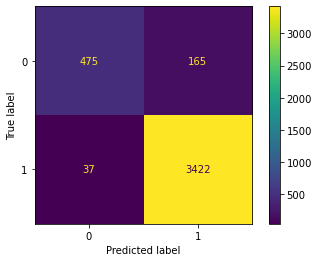

In [398]:

plot_confusion_matrix(lr, X_test, y_test)
plt.grid(False)

In [399]:
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [400]:
#XGBoost model with accuracy score of 91%
xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(xgb_accuracy )

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9194925591607709


In [401]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       640
           1       0.94      0.97      0.95      3459

    accuracy                           0.92      4099
   macro avg       0.87      0.81      0.83      4099
weighted avg       0.92      0.92      0.92      4099



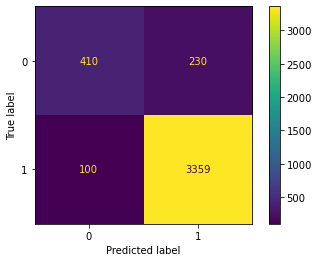

In [402]:
plot_confusion_matrix(model_xgb, X_test, y_test)
plt.grid(False)

In [403]:
#Random Forrest Classifier model with 87% accuracy score
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(X_train, y_train)
rf_y = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y)
print(rf_acc)

0.8672847035862405


In [404]:
print(classification_report(y_test,rf_y))

              precision    recall  f1-score   support

           0       0.95      0.16      0.27       640
           1       0.87      1.00      0.93      3459

    accuracy                           0.87      4099
   macro avg       0.91      0.58      0.60      4099
weighted avg       0.88      0.87      0.82      4099



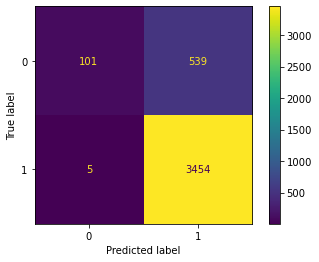

In [405]:
plot_confusion_matrix(rf_model, X_test, y_test)
plt.grid(False)

In [406]:
#Decision Tree classifier with 85% accuracy
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print(dtree_accuracy)

0.8631373505733105


In [407]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       640
           1       0.91      0.92      0.92      3459

    accuracy                           0.86      4099
   macro avg       0.74      0.73      0.73      4099
weighted avg       0.86      0.86      0.86      4099



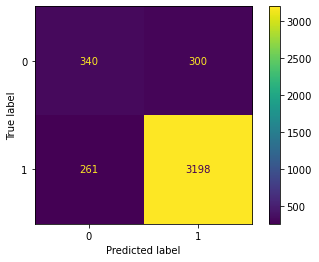

In [408]:
plot_confusion_matrix(dtree, X_test, y_test)
plt.grid(False)

In [409]:
from imblearn.over_sampling import SMOTE

In [410]:
# we can see that our data is unbalanced, we use SMOT to oversample the data to see if any improvement with accuracy score
smt = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_smote, y_smote = smt.fit_resample(X, y)

In [411]:
#The data is balanced now
y_smote.value_counts()

0    17277
1    17277
Name: Star_rating, dtype: int64

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote)

In [413]:
#Regression model did not show any improvement after oversampling
lr_smt = LogisticRegression()
lr_smt_model = lr_smt.fit(X_train, y_train)
lr_smt_y = lr_smt_model.predict(X_test)
r_smt__acc = accuracy_score(y_test, lr_smt_y)

In [414]:
print(r_smt__acc)

0.9505729829841417


In [415]:
print(classification_report(y_test, lr_smt_y))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4319
           1       0.97      0.93      0.95      4320

    accuracy                           0.95      8639
   macro avg       0.95      0.95      0.95      8639
weighted avg       0.95      0.95      0.95      8639



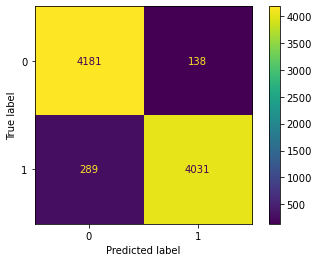

In [416]:

plot_confusion_matrix(lr_smt_model, X_test, y_test)
plt.grid(False)

In [417]:
#Random Forest Classifier shows improvement aftfer oversmapling from 87% to 95%
rf_smt = RandomForestClassifier(n_estimators=100)
rf_smt_model = rf_smt.fit(X_train, y_train)
rf_smt_y = rf_smt_model.predict(X_test)
rf_smt_acc = accuracy_score(y_test, rf_smt_y)

In [418]:
print(rf_smt_acc)

0.9481421460817224


In [419]:
print(classification_report(y_test, rf_smt_y))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4319
           1       0.94      0.95      0.95      4320

    accuracy                           0.95      8639
   macro avg       0.95      0.95      0.95      8639
weighted avg       0.95      0.95      0.95      8639



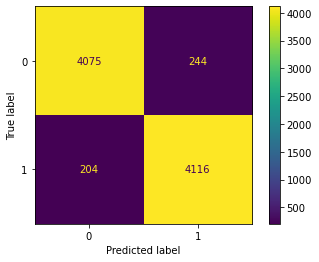

In [420]:
plot_confusion_matrix(rf_smt_model, X_test, y_test)
plt.grid(False)

In [421]:
#XGboost shows no improvement 
xgb_smt = XGBClassifier()
xgb_smt_model = xgb_smt.fit(X_train, y_train)
xgb_smt_y = xgb_smt_model.predict(X_test)
xgb_smt_accuracy = accuracy_score(y_test, xgb_smt_y)
print(xgb_accuracy )

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9194925591607709


In [422]:
print(classification_report(y_test, xgb_smt_y))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4319
           1       0.95      0.95      0.95      4320

    accuracy                           0.95      8639
   macro avg       0.95      0.95      0.95      8639
weighted avg       0.95      0.95      0.95      8639



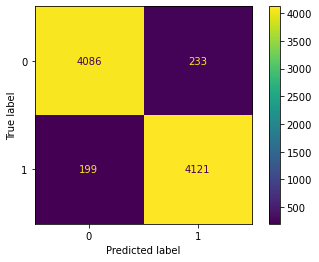

In [423]:
plot_confusion_matrix(xgb_smt_model, X_test, y_test)
plt.grid(False)

In [424]:
#Desicion Tree shows improvement from 85% to 89%
dtree_smot = DecisionTreeClassifier()
dtree_smot_model = dtree_smot.fit(X_train, y_train)
dtree_smot_y = dtree_smot.predict(X_test)
dtree_accuracy_smot = accuracy_score(y_test, dtree_smot_y)
print(dtree_accuracy_smot)

0.8877184859358722


In [425]:
print(classification_report(y_test, dtree_smot_y))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4319
           1       0.90      0.87      0.89      4320

    accuracy                           0.89      8639
   macro avg       0.89      0.89      0.89      8639
weighted avg       0.89      0.89      0.89      8639



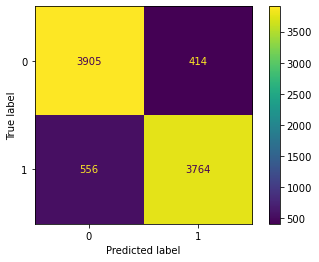

In [426]:
plot_confusion_matrix(dtree_smot_model, X_test, y_test)
plt.grid(False)